# Smart Energy Meter Analysis

## Energy Meter 1

In [1]:
import pandas as pd

file_path = 'Energy Meter 1.xlsx'
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name='Sheet1')
df.head()

,Date,Time,Volatage,Current,Power,Units
0,2024-09-15 01:35:02.763,01:05:02,NaN,NaN,NaN,NaN
1,2024-09-15 01:35:06.404,01:05:06,NaN,NaN,NaN,NaN
2,2024-09-15 01:35:11.233,01:05:11,NaN,NaN,NaN,NaN
3,2024-09-15 01:36:34.307,01:06:34,NaN,NaN,NaN,NaN
4,2024-09-15 01:36:57.939,01:06:57,230.0,5.5,1250.0,10.0


### Handelling Missing Values

In [2]:
df_cleaned = df.dropna(subset=['Volatage', 'Current', 'Power', 'Units'], how='all')

df_cleaned[['Volatage', 'Current', 'Power', 'Units']] = df_cleaned[['Volatage', 'Current', 'Power', 'Units']].fillna(method='ffill')

missing_values = df_cleaned.isnull().sum()
df_cleaned.head(), missing_values

C:\Users\ombav\AppData\Local\Temp\ipykernel_21740\476506190.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['Volatage', 'Current', 'Power', 'Units']] = df_cleaned[['Volatage', 'Current', 'Power', 'Units']].fillna(method='ffill')


(                     Date      Time  Volatage  Current    Power  Units
 4 2024-09-15 01:36:57.939  01:06:57    230.00      5.5  1250.00  10.00
 5 2024-09-15 01:44:43.650  01:14:43      2.13     -0.3    -0.64   0.00
 6 2024-09-15 01:44:50.607  01:14:50      1.85     -0.3    -0.55   0.00
 7 2024-09-15 01:44:58.196  01:14:58      2.76     -0.3    -0.83   0.00
 8 2024-09-15 01:45:08.477  01:15:08      2.45     -0.3    -0.74  -0.01,
 Date        0
 Time        0
 Volatage    0
 Current     0
 Power       0
 Units       0
 dtype: int64)

### Plotting the Distribution, Corelation Matrix and Summary Statistics of the data

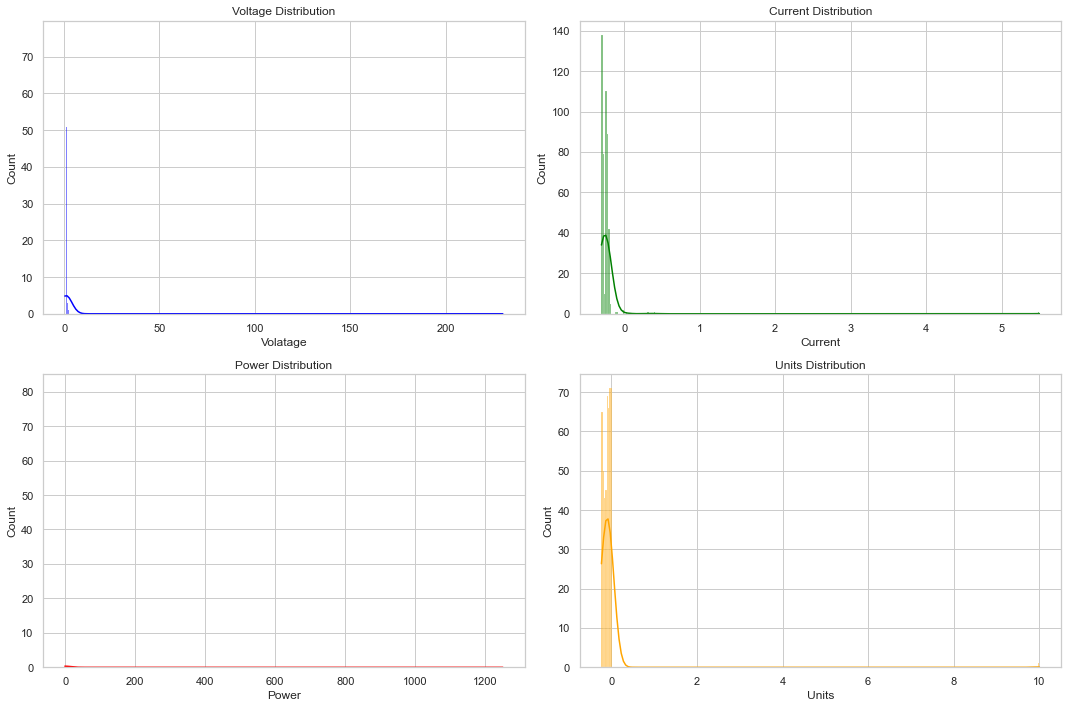

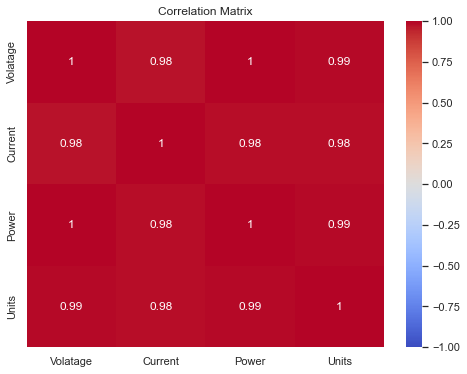

,Volatage,Current,Power,Units
count,481.000000,481.000000,481.000000,481.000000
mean,1.567963,-0.237380,2.327235,-0.078108
std,10.442907,0.268305,57.007619,0.465886
min,0.400000,-0.300000,-0.830000,-0.230000
25%,0.900000,-0.290000,-0.320000,-0.160000
50%,1.070000,-0.240000,-0.260000,-0.090000
75%,1.210000,-0.220000,-0.210000,-0.040000
max,230.000000,5.500000,1250.000000,10.000000


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

summary_stats = df_cleaned.describe()

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df_cleaned['Volatage'], kde=True, color='blue')
plt.title('Voltage Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df_cleaned['Current'], kde=True, color='green')
plt.title('Current Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df_cleaned['Power'], kde=True, color='red')
plt.title('Power Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df_cleaned['Units'], kde=True, color='orange')
plt.title('Units Distribution')

plt.tight_layout()
plt.show()

correlation_matrix = df_cleaned[['Volatage', 'Current', 'Power', 'Units']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

summary_stats


### Anomaly Detection

#### Z-Score

In [4]:
import numpy as np

def detect_outliers_zscore(df, threshold=3):
    outliers = {}
    for col in df.select_dtypes(include=[np.number]).columns:  # Only consider numeric columns
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        outliers[col] = df[z_scores > threshold]
    return outliers

outliers_zscore = detect_outliers_zscore(df_cleaned, threshold=3)

for col, outliers in outliers_zscore.items():
    print(f"Outliers in {col}:")
    print(outliers)


Outliers in Volatage:
                     Date      Time  Volatage  Current   Power  Units
4 2024-09-15 01:36:57.939  01:06:57     230.0      5.5  1250.0   10.0
Outliers in Current:
                     Date      Time  Volatage  Current   Power  Units
4 2024-09-15 01:36:57.939  01:06:57     230.0      5.5  1250.0   10.0
Outliers in Power:
                     Date      Time  Volatage  Current   Power  Units
4 2024-09-15 01:36:57.939  01:06:57     230.0      5.5  1250.0   10.0
Outliers in Units:
                     Date      Time  Volatage  Current   Power  Units
4 2024-09-15 01:36:57.939  01:06:57     230.0      5.5  1250.0   10.0


#### IQR

In [5]:
def detect_outliers_iqr(df):
    outliers = {}
    for col in df.select_dtypes(include=[np.number]).columns:  # Only consider numeric columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers[col] = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    return outliers

outliers_iqr = detect_outliers_iqr(df_cleaned)

for col, outliers in outliers_iqr.items():
    print(f"Outliers in {col}:")
    print(outliers)

Outliers in Volatage:
                       Date      Time  Volatage  Current    Power  Units
4   2024-09-15 01:36:57.939  01:06:57    230.00     5.50  1250.00  10.00
5   2024-09-15 01:44:43.650  01:14:43      2.13    -0.30    -0.64   0.00
6   2024-09-15 01:44:50.607  01:14:50      1.85    -0.30    -0.55   0.00
7   2024-09-15 01:44:58.196  01:14:58      2.76    -0.30    -0.83   0.00
8   2024-09-15 01:45:08.477  01:15:08      2.45    -0.30    -0.74  -0.01
11  2024-09-15 01:45:31.667  01:15:31      2.52    -0.30    -0.75  -0.01
13  2024-09-15 01:45:46.731  01:15:46      1.76    -0.30    -0.53  -0.01
16  2024-09-15 01:46:06.497  01:16:06      2.24    -0.30    -0.67   0.00
18  2024-09-15 01:46:22.424  01:16:22      2.31    -0.30    -0.69   0.00
20  2024-09-15 01:46:37.780  01:16:37      2.13    -0.30    -0.64  -0.01
21  2024-09-15 01:46:47.517  01:16:47      1.71    -0.30    -0.51  -0.01
22  2024-09-15 01:47:51.448  01:17:51      1.71    -0.29    -0.49   0.00
30  2024-09-15 01:48:59.796  

#### Box Plots

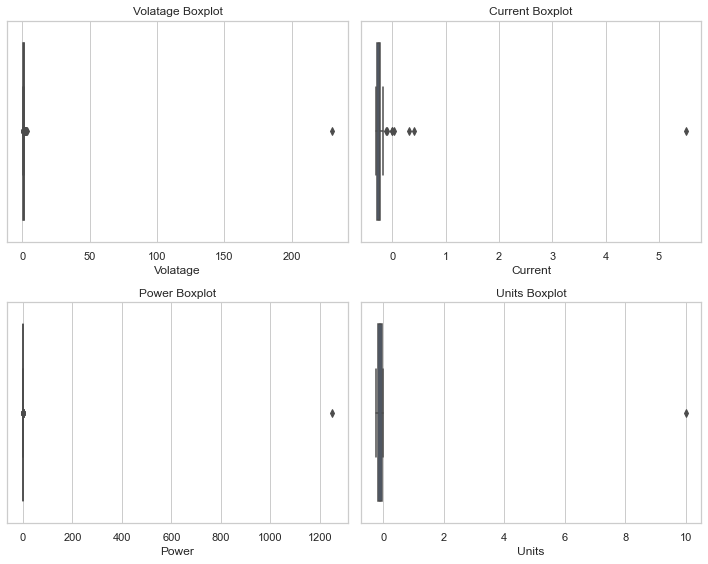

In [6]:
plt.figure(figsize=(10, 8))

for i, col in enumerate(df_cleaned.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'{col} Boxplot')

plt.tight_layout()
plt.show()

#### Isolation Forest

In [7]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.01)
outliers_iso = iso_forest.fit_predict(df_cleaned[['Volatage', 'Current', 'Power', 'Units']])

df_cleaned['Outlier'] = outliers_iso
outlier_rows = df_cleaned[df_cleaned['Outlier'] == -1]
print(outlier_rows)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


                       Date      Time  Volatage  Current    Power  Units  \
4   2024-09-15 01:36:57.939  01:06:57    230.00     5.50  1250.00  10.00   
7   2024-09-15 01:44:58.196  01:14:58      2.76    -0.30    -0.83   0.00   
66  2024-10-08 20:41:07.129  20:11:07      0.99     0.31     0.30  -0.01   
67  2024-10-08 20:41:14.657  20:11:14      1.61     0.41     0.66  -0.01   
252 2024-10-08 21:03:21.190  20:33:21      3.58     0.00     0.01  -0.09   

     Outlier  
4         -1  
7         -1  
66        -1  
67        -1  
252       -1  


C:\Users\ombav\AppData\Local\Temp\ipykernel_21740\2737867271.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Outlier'] = outliers_iso


In [8]:
df_cleaned.to_csv("Energy Meter 1.csv")

#### LOF

In [9]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
outliers_lof = lof.fit_predict(df_cleaned[['Volatage', 'Current', 'Power', 'Units']])

df_cleaned['LOF_Outlier'] = outliers_lof
outlier_rows_lof = df_cleaned[df_cleaned['LOF_Outlier'] == -1]
print(outlier_rows_lof)

                      Date      Time  Volatage  Current    Power  Units  \
4  2024-09-15 01:36:57.939  01:06:57    230.00     5.50  1250.00  10.00   
31 2024-10-08 20:36:49.027  20:06:49      1.34    -0.01    -0.01   0.00   
66 2024-10-08 20:41:07.129  20:11:07      0.99     0.31     0.30  -0.01   
67 2024-10-08 20:41:14.657  20:11:14      1.61     0.41     0.66  -0.01   
69 2024-10-08 20:41:29.329  20:11:29      1.27     0.03     0.03  -0.01   

    Outlier  LOF_Outlier  
4        -1           -1  
31        1           -1  
66       -1           -1  
67       -1           -1  
69        1           -1  


C:\Users\ombav\AppData\Local\Temp\ipykernel_21740\1242387527.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['LOF_Outlier'] = outliers_lof


## Enargy Meter 2

In [10]:
file_path = 'Energy Meter 2.xlsx'
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name='Sheet1')
df.head()

,Date,Time,Volatage,Current,Power,Units
0,2024-10-08 17:05:34.156,16:35:34,NaN,NaN,NaN,NaN
1,2024-10-08 17:19:28.447,16:49:28,3.17,0.11,0.36,0.0
2,2024-10-08 17:19:35.487,16:49:35,2.05,0.11,0.23,0.0
3,2024-10-08 17:19:42.012,16:49:42,2.01,0.11,0.23,0.0
4,2024-10-08 17:19:50.400,16:49:50,3.47,0.11,0.39,0.0


### Handelling Missing Values

In [11]:
df_cleaned = df.dropna(subset=['Volatage', 'Current', 'Power', 'Units'], how='all')

df_cleaned[['Volatage', 'Current', 'Power', 'Units']] = df_cleaned[['Volatage', 'Current', 'Power', 'Units']].fillna(method='ffill')

missing_values = df_cleaned.isnull().sum()
df_cleaned.head(), missing_values

C:\Users\ombav\AppData\Local\Temp\ipykernel_21740\476506190.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['Volatage', 'Current', 'Power', 'Units']] = df_cleaned[['Volatage', 'Current', 'Power', 'Units']].fillna(method='ffill')


(                     Date      Time  Volatage  Current  Power  Units
 1 2024-10-08 17:19:28.447  16:49:28      3.17     0.11   0.36    0.0
 2 2024-10-08 17:19:35.487  16:49:35      2.05     0.11   0.23    0.0
 3 2024-10-08 17:19:42.012  16:49:42      2.01     0.11   0.23    0.0
 4 2024-10-08 17:19:50.400  16:49:50      3.47     0.11   0.39    0.0
 5 2024-10-08 17:19:59.099  16:49:59      3.30     0.11   0.38    0.0,
 Date        0
 Time        0
 Volatage    0
 Current     0
 Power       0
 Units       0
 dtype: int64)

### Plotting the Distribution, Corelation Matrix and Summary Statistics of the data

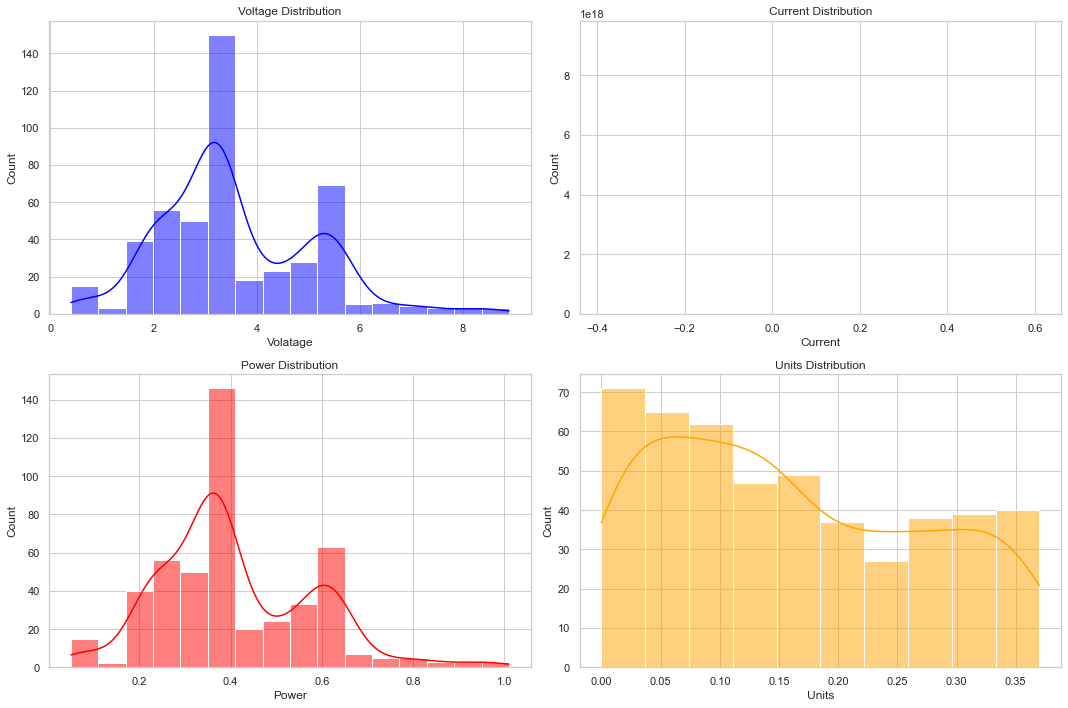

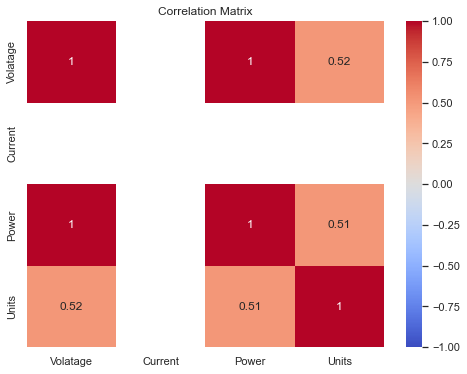

,Volatage,Current,Power,Units
count,475.000000,4.750000e+02,475.000000,475.000000
mean,3.571179,1.100000e-01,0.406842,0.158989
std,1.474448,4.445574e-16,0.168304,0.110592
min,0.400000,1.100000e-01,0.050000,0.000000
25%,2.610000,1.100000e-01,0.300000,0.060000
50%,3.270000,1.100000e-01,0.370000,0.140000
75%,4.695000,1.100000e-01,0.535000,0.250000
max,8.890000,1.100000e-01,1.010000,0.370000


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

summary_stats = df_cleaned.describe()

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df_cleaned['Volatage'], kde=True, color='blue')
plt.title('Voltage Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df_cleaned['Current'], kde=True, color='green')
plt.title('Current Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df_cleaned['Power'], kde=True, color='red')
plt.title('Power Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df_cleaned['Units'], kde=True, color='orange')
plt.title('Units Distribution')

plt.tight_layout()
plt.show()

correlation_matrix = df_cleaned[['Volatage', 'Current', 'Power', 'Units']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

summary_stats


### Anomaly Detection

#### Z-Score

In [13]:
import numpy as np

def detect_outliers_zscore(df, threshold=3):
    outliers = {}
    for col in df.select_dtypes(include=[np.number]).columns:  # Only consider numeric columns
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        outliers[col] = df[z_scores > threshold]
    return outliers

outliers_zscore = detect_outliers_zscore(df_cleaned, threshold=3)

for col, outliers in outliers_zscore.items():
    print(f"Outliers in {col}:")
    print(outliers)


Outliers in Volatage:
                       Date      Time  Volatage  Current  Power  Units
26  2024-10-08 20:37:01.286  20:07:01      8.10     0.11   0.92   0.00
350 2024-10-08 21:16:10.998  20:46:10      8.58     0.11   0.98   0.25
354 2024-10-08 21:16:40.673  20:46:40      8.22     0.11   0.94   0.25
381 2024-10-08 21:19:59.709  20:49:59      8.40     0.11   0.96   0.28
410 2024-10-08 21:23:27.258  20:53:27      8.89     0.11   1.01   0.31
457 2024-10-08 21:29:03.336  20:59:03      8.28     0.11   0.94   0.36
Outliers in Current:
Empty DataFrame
Columns: [Date, Time, Volatage, Current, Power, Units]
Index: []
Outliers in Power:
                       Date      Time  Volatage  Current  Power  Units
26  2024-10-08 20:37:01.286  20:07:01      8.10     0.11   0.92   0.00
350 2024-10-08 21:16:10.998  20:46:10      8.58     0.11   0.98   0.25
354 2024-10-08 21:16:40.673  20:46:40      8.22     0.11   0.94   0.25
381 2024-10-08 21:19:59.709  20:49:59      8.40     0.11   0.96   0.28
410 2

#### IQR

In [14]:
def detect_outliers_iqr(df):
    outliers = {}
    for col in df.select_dtypes(include=[np.number]).columns:  # Only consider numeric columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers[col] = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    return outliers

outliers_iqr = detect_outliers_iqr(df_cleaned)

for col, outliers in outliers_iqr.items():
    print(f"Outliers in {col}:")
    print(outliers)

Outliers in Volatage:
                       Date      Time  Volatage  Current  Power  Units
26  2024-10-08 20:37:01.286  20:07:01      8.10     0.11   0.92   0.00
350 2024-10-08 21:16:10.998  20:46:10      8.58     0.11   0.98   0.25
354 2024-10-08 21:16:40.673  20:46:40      8.22     0.11   0.94   0.25
381 2024-10-08 21:19:59.709  20:49:59      8.40     0.11   0.96   0.28
410 2024-10-08 21:23:27.258  20:53:27      8.89     0.11   1.01   0.31
457 2024-10-08 21:29:03.336  20:59:03      8.28     0.11   0.94   0.36
Outliers in Current:
Empty DataFrame
Columns: [Date, Time, Volatage, Current, Power, Units]
Index: []
Outliers in Power:
                       Date      Time  Volatage  Current  Power  Units
26  2024-10-08 20:37:01.286  20:07:01      8.10     0.11   0.92   0.00
350 2024-10-08 21:16:10.998  20:46:10      8.58     0.11   0.98   0.25
354 2024-10-08 21:16:40.673  20:46:40      8.22     0.11   0.94   0.25
381 2024-10-08 21:19:59.709  20:49:59      8.40     0.11   0.96   0.28
410 2

#### Box Plot

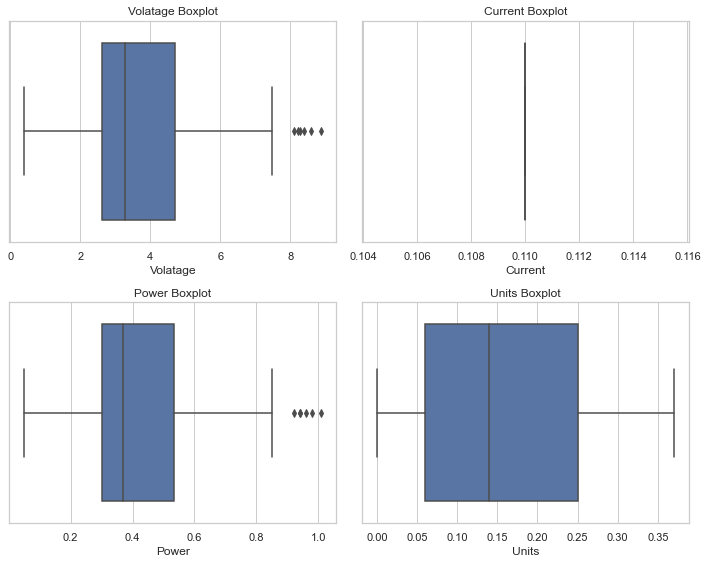

In [15]:
plt.figure(figsize=(10, 8))

for i, col in enumerate(df_cleaned.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'{col} Boxplot')

plt.tight_layout()
plt.show()

#### Isolation Forest

In [16]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.01)
outliers_iso = iso_forest.fit_predict(df_cleaned[['Volatage', 'Current', 'Power', 'Units']])

df_cleaned['Outlier'] = outliers_iso
outlier_rows = df_cleaned[df_cleaned['Outlier'] == -1]
print(outlier_rows)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\ombav\AppData\Local\Temp\ipykernel_21740\2737867271.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Outlier'] = outliers_iso


                       Date      Time  Volatage  Current  Power  Units  \
26  2024-10-08 20:37:01.286  20:07:01      8.10     0.11   0.92   0.00   
350 2024-10-08 21:16:10.998  20:46:10      8.58     0.11   0.98   0.25   
410 2024-10-08 21:23:27.258  20:53:27      8.89     0.11   1.01   0.31   
457 2024-10-08 21:29:03.336  20:59:03      8.28     0.11   0.94   0.36   
463 2024-10-08 21:29:44.221  20:59:44      1.14     0.11   0.13   0.36   

     Outlier  
26        -1  
350       -1  
410       -1  
457       -1  
463       -1  


In [17]:
df_cleaned.to_csv("Energy Meter 2.csv")

#### LOF

In [18]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
outliers_lof = lof.fit_predict(df_cleaned[['Volatage', 'Current', 'Power', 'Units']])

df_cleaned['LOF_Outlier'] = outliers_lof
outlier_rows_lof = df_cleaned[df_cleaned['LOF_Outlier'] == -1]
print(outlier_rows_lof)

                       Date      Time  Volatage  Current  Power  Units  \
195 2024-10-08 20:57:11.890  20:27:11      6.31     0.11   0.72   0.11   
277 2024-10-08 21:07:11.893  20:37:11      6.29     0.11   0.72   0.17   
395 2024-10-08 21:21:42.346  20:51:42      6.24     0.11   0.71   0.29   
434 2024-10-08 21:26:20.957  20:56:20      6.84     0.11   0.78   0.33   
467 2024-10-08 21:30:11.901  21:00:11      6.55     0.11   0.75   0.37   

     Outlier  LOF_Outlier  
195        1           -1  
277        1           -1  
395        1           -1  
434        1           -1  
467        1           -1  


C:\Users\ombav\AppData\Local\Temp\ipykernel_21740\1242387527.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['LOF_Outlier'] = outliers_lof


## Energy Meter  3

In [19]:
file_path = 'Energy Meter 3.xlsx'
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name='Sheet1')
df.head()

,Date,Time,Volatage,Current,Power,Units
0,2024-10-08 20:08:27.480,19:38:27,2.24,0.11,0.26,0.01
1,2024-10-08 20:08:29.419,19:38:29,NaN,NaN,NaN,NaN
2,2024-10-08 20:08:34.223,19:38:34,4.56,0.11,0.52,0.01
3,2024-10-08 20:08:41.230,19:38:41,4.21,0.11,0.48,0.01
4,2024-10-08 20:08:47.837,19:38:47,4.09,0.11,0.47,0.01


### Handelling Missing Values

In [20]:
df_cleaned = df.dropna(subset=['Volatage', 'Current', 'Power', 'Units'], how='all')

df_cleaned[['Volatage', 'Current', 'Power', 'Units']] = df_cleaned[['Volatage', 'Current', 'Power', 'Units']].fillna(method='ffill')

missing_values = df_cleaned.isnull().sum()
df_cleaned.head(), missing_values

C:\Users\ombav\AppData\Local\Temp\ipykernel_21740\476506190.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['Volatage', 'Current', 'Power', 'Units']] = df_cleaned[['Volatage', 'Current', 'Power', 'Units']].fillna(method='ffill')


(                     Date      Time  Volatage  Current  Power  Units
 0 2024-10-08 20:08:27.480  19:38:27      2.24     0.11   0.26   0.01
 2 2024-10-08 20:08:34.223  19:38:34      4.56     0.11   0.52   0.01
 3 2024-10-08 20:08:41.230  19:38:41      4.21     0.11   0.48   0.01
 4 2024-10-08 20:08:47.837  19:38:47      4.09     0.11   0.47   0.01
 5 2024-10-08 20:08:54.744  19:38:54      3.12     0.11   0.36   0.01,
 Date        0
 Time        0
 Volatage    0
 Current     0
 Power       0
 Units       0
 dtype: int64)

### Plotting the Distribution, Corelation Matrix and Summary Statistics of the data

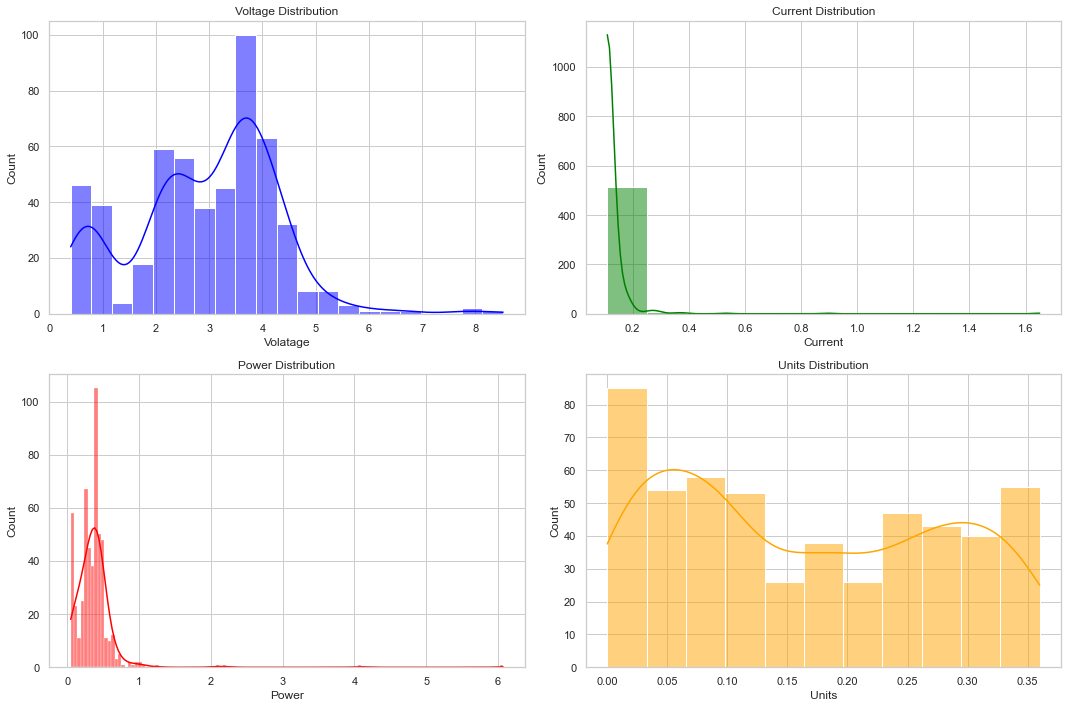

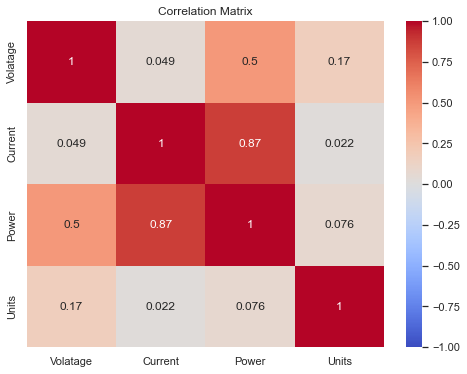

,Volatage,Current,Power,Units
count,525.000000,525.000000,525.000000,525.000000
mean,2.919638,0.122895,0.374552,0.163467
std,1.338845,0.082112,0.362254,0.113970
min,0.400000,0.110000,0.050000,0.000000
25%,2.130000,0.110000,0.250000,0.060000
50%,3.120000,0.110000,0.370000,0.160000
75%,3.760000,0.110000,0.440000,0.270000
max,8.520000,1.650000,6.070000,0.360000


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

summary_stats = df_cleaned.describe()

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df_cleaned['Volatage'], kde=True, color='blue')
plt.title('Voltage Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df_cleaned['Current'], kde=True, color='green')
plt.title('Current Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df_cleaned['Power'], kde=True, color='red')
plt.title('Power Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df_cleaned['Units'], kde=True, color='orange')
plt.title('Units Distribution')

plt.tight_layout()
plt.show()

correlation_matrix = df_cleaned[['Volatage', 'Current', 'Power', 'Units']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

summary_stats

### Anomaly Detection

#### Z-Score

In [22]:
import numpy as np

def detect_outliers_zscore(df, threshold=3):
    outliers = {}
    for col in df.select_dtypes(include=[np.number]).columns:  # Only consider numeric columns
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        outliers[col] = df[z_scores > threshold]
    return outliers

outliers_zscore = detect_outliers_zscore(df_cleaned, threshold=3)

for col, outliers in outliers_zscore.items():
    print(f"Outliers in {col}:")
    print(outliers)


Outliers in Volatage:
                       Date      Time  Volatage  Current  Power  Units
307 2024-10-08 22:04:41.677  21:34:41      7.88     0.11   0.90   0.19
391 2024-10-08 22:15:26.901  21:45:26      7.79     0.11   0.89   0.27
453 2024-10-08 22:22:32.239  21:52:32      8.52     0.11   0.97   0.31
Outliers in Current:
                       Date      Time  Volatage  Current  Power  Units
249 2024-10-08 21:58:13.890  21:28:13      4.56     0.89   4.07   0.13
250 2024-10-08 21:58:20.461  21:28:20      3.95     0.53   2.08   0.13
251 2024-10-08 21:58:26.425  21:28:26      5.81     0.38   2.20   0.14
253 2024-10-08 21:58:39.097  21:28:39      3.67     1.65   6.07   0.15
Outliers in Power:
                       Date      Time  Volatage  Current  Power  Units
249 2024-10-08 21:58:13.890  21:28:13      4.56     0.89   4.07   0.13
250 2024-10-08 21:58:20.461  21:28:20      3.95     0.53   2.08   0.13
251 2024-10-08 21:58:26.425  21:28:26      5.81     0.38   2.20   0.14
253 2024-10-08 

#### IQR

In [23]:
def detect_outliers_iqr(df):
    outliers = {}
    for col in df.select_dtypes(include=[np.number]).columns:  # Only consider numeric columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers[col] = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    return outliers

outliers_iqr = detect_outliers_iqr(df_cleaned)

for col, outliers in outliers_iqr.items():
    print(f"Outliers in {col}:")
    print(outliers)

Outliers in Volatage:
                       Date      Time  Volatage  Current  Power  Units
175 2024-10-08 21:49:49.922  21:19:49      6.74     0.11   0.77   0.08
307 2024-10-08 22:04:41.677  21:34:41      7.88     0.11   0.90   0.19
390 2024-10-08 22:15:19.938  21:45:19      6.53     0.11   0.74   0.27
391 2024-10-08 22:15:26.901  21:45:26      7.79     0.11   0.89   0.27
453 2024-10-08 22:22:32.239  21:52:32      8.52     0.11   0.97   0.31
Outliers in Current:
                       Date      Time  Volatage  Current  Power  Units
249 2024-10-08 21:58:13.890  21:28:13      4.56     0.89   4.07   0.13
250 2024-10-08 21:58:20.461  21:28:20      3.95     0.53   2.08   0.13
251 2024-10-08 21:58:26.425  21:28:26      5.81     0.38   2.20   0.14
252 2024-10-08 21:58:33.010  21:28:33      3.40     0.36   1.23   0.14
253 2024-10-08 21:58:39.097  21:28:39      3.67     1.65   6.07   0.15
313 2024-10-08 22:05:22.137  21:35:22      0.57     0.30   0.17   0.19
314 2024-10-08 22:05:28.333  21:35

#### Box Plot

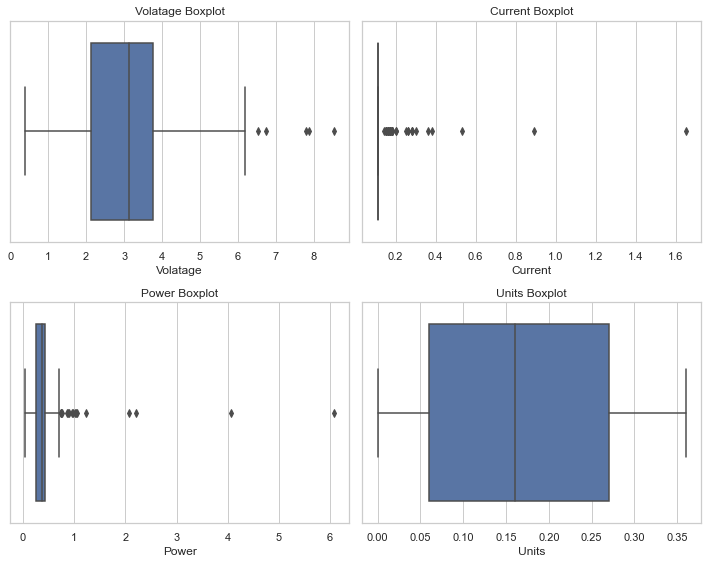

In [24]:
plt.figure(figsize=(10, 8))

for i, col in enumerate(df_cleaned.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'{col} Boxplot')

plt.tight_layout()
plt.show()

#### Isolation Forest

In [25]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.01)
outliers_iso = iso_forest.fit_predict(df_cleaned[['Volatage', 'Current', 'Power', 'Units']])

df_cleaned['Outlier'] = outliers_iso
outlier_rows = df_cleaned[df_cleaned['Outlier'] == -1]
print(outlier_rows)

                       Date      Time  Volatage  Current  Power  Units  \
249 2024-10-08 21:58:13.890  21:28:13      4.56     0.89   4.07   0.13   
250 2024-10-08 21:58:20.461  21:28:20      3.95     0.53   2.08   0.13   
251 2024-10-08 21:58:26.425  21:28:26      5.81     0.38   2.20   0.14   
252 2024-10-08 21:58:33.010  21:28:33      3.40     0.36   1.23   0.14   
253 2024-10-08 21:58:39.097  21:28:39      3.67     1.65   6.07   0.15   
313 2024-10-08 22:05:22.137  21:35:22      0.57     0.30   0.17   0.19   

     Outlier  
249       -1  
250       -1  
251       -1  
252       -1  
253       -1  
313       -1  


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\ombav\AppData\Local\Temp\ipykernel_21740\2737867271.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Outlier'] = outliers_iso


In [26]:
df_cleaned.to_csv("Energy Meter 3.csv")

#### LOF

In [27]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
outliers_lof = lof.fit_predict(df_cleaned[['Volatage', 'Current', 'Power', 'Units']])

df_cleaned['LOF_Outlier'] = outliers_lof
outlier_rows_lof = df_cleaned[df_cleaned['LOF_Outlier'] == -1]
print(outlier_rows_lof)

                       Date      Time  Volatage  Current  Power  Units  \
249 2024-10-08 21:58:13.890  21:28:13      4.56     0.89   4.07   0.13   
250 2024-10-08 21:58:20.461  21:28:20      3.95     0.53   2.08   0.13   
252 2024-10-08 21:58:33.010  21:28:33      3.40     0.36   1.23   0.14   
253 2024-10-08 21:58:39.097  21:28:39      3.67     1.65   6.07   0.15   
307 2024-10-08 22:04:41.677  21:34:41      7.88     0.11   0.90   0.19   
453 2024-10-08 22:22:32.239  21:52:32      8.52     0.11   0.97   0.31   

     Outlier  LOF_Outlier  
249       -1           -1  
250       -1           -1  
252       -1           -1  
253       -1           -1  
307        1           -1  
453        1           -1  


C:\Users\ombav\AppData\Local\Temp\ipykernel_21740\1242387527.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['LOF_Outlier'] = outliers_lof


## Energy Meter 4

In [28]:
file_path = 'Energy Meter 4.xlsx'
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name='Sheet1')
df.head()

,Date,Time,Volatage,Current,Power,Units
0,2024-10-08 20:23:15.263,19:53:15,1.27,0.11,0.15,0.02
1,2024-10-08 20:23:21.558,20:23:21,NaN,NaN,NaN,NaN
2,2024-10-08 20:23:22.601,19:53:22,4.78,0.11,0.55,0.02
3,2024-10-08 20:23:29.705,19:53:29,0.90,0.11,0.10,0.02
4,2024-10-08 20:23:37.086,19:53:37,4.63,0.11,0.53,0.02


### Handelling Missing Values

In [29]:
df_cleaned = df.dropna(subset=['Volatage', 'Current', 'Power', 'Units'], how='all')

df_cleaned[['Volatage', 'Current', 'Power', 'Units']] = df_cleaned[['Volatage', 'Current', 'Power', 'Units']].fillna(method='ffill')

missing_values = df_cleaned.isnull().sum()
df_cleaned.head(), missing_values

C:\Users\ombav\AppData\Local\Temp\ipykernel_21740\476506190.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['Volatage', 'Current', 'Power', 'Units']] = df_cleaned[['Volatage', 'Current', 'Power', 'Units']].fillna(method='ffill')


(                     Date      Time  Volatage  Current  Power  Units
 0 2024-10-08 20:23:15.263  19:53:15      1.27     0.11   0.15   0.02
 2 2024-10-08 20:23:22.601  19:53:22      4.78     0.11   0.55   0.02
 3 2024-10-08 20:23:29.705  19:53:29      0.90     0.11   0.10   0.02
 4 2024-10-08 20:23:37.086  19:53:37      4.63     0.11   0.53   0.02
 5 2024-10-08 20:23:44.262  19:53:44      3.20     0.11   0.36   0.02,
 Date        0
 Time        0
 Volatage    0
 Current     0
 Power       0
 Units       0
 dtype: int64)

### Plotting the Distribution, Corelation Matrix and Summary Statistics of the data

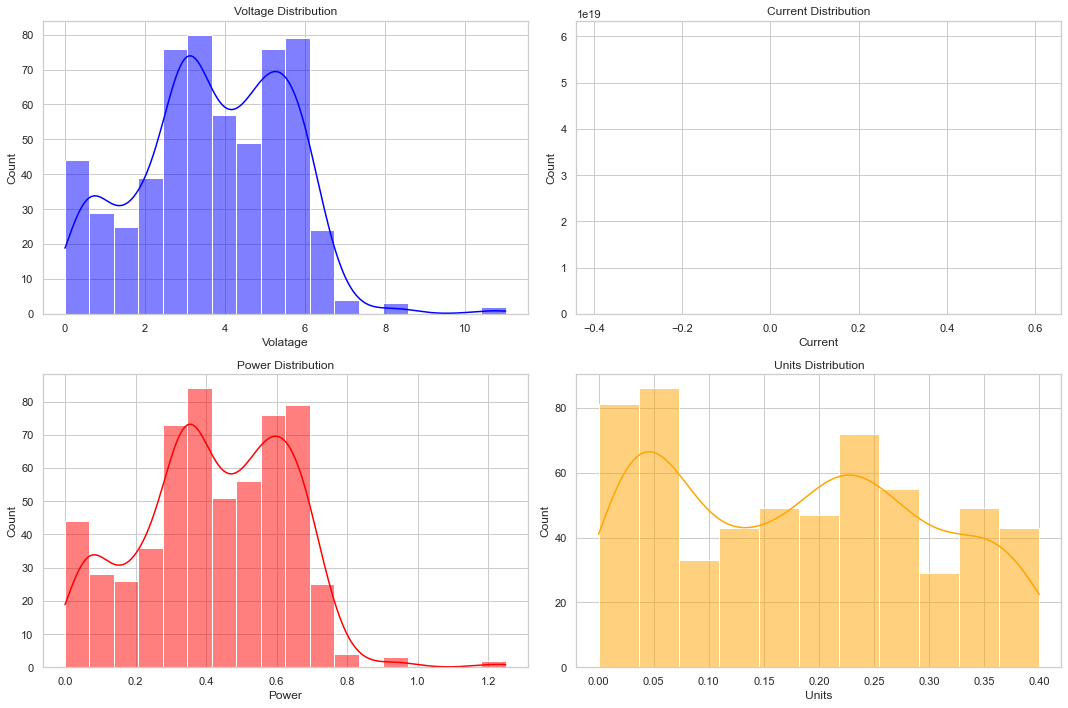

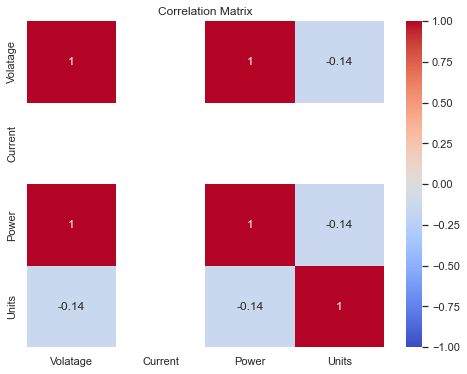

,Volatage,Current,Power,Units
count,587.000000,5.870000e+02,587.000000,587.000000
mean,3.704174,1.100000e-01,0.421874,0.181005
std,1.827781,4.722472e-16,0.208324,0.118948
min,0.000000,1.100000e-01,0.000000,0.000000
25%,2.610000,1.100000e-01,0.295000,0.070000
50%,3.670000,1.100000e-01,0.420000,0.190000
75%,5.185000,1.100000e-01,0.590000,0.270000
max,11.010000,1.100000e-01,1.250000,0.400000


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

summary_stats = df_cleaned.describe()

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df_cleaned['Volatage'], kde=True, color='blue')
plt.title('Voltage Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df_cleaned['Current'], kde=True, color='green')
plt.title('Current Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df_cleaned['Power'], kde=True, color='red')
plt.title('Power Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df_cleaned['Units'], kde=True, color='orange')
plt.title('Units Distribution')

plt.tight_layout()
plt.show()

correlation_matrix = df_cleaned[['Volatage', 'Current', 'Power', 'Units']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

summary_stats

### Anomaly Detection

#### Z-Score

In [31]:
import numpy as np

def detect_outliers_zscore(df, threshold=3):
    outliers = {}
    for col in df.select_dtypes(include=[np.number]).columns:  # Only consider numeric columns
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        outliers[col] = df[z_scores > threshold]
    return outliers

outliers_zscore = detect_outliers_zscore(df_cleaned, threshold=3)

for col, outliers in outliers_zscore.items():
    print(f"Outliers in {col}:")
    print(outliers)

Outliers in Volatage:
                       Date      Time  Volatage  Current  Power  Units
190 2024-10-08 21:44:44.967  21:44:44     11.01     0.11   1.25   0.10
495 2024-10-08 22:20:13.991  22:20:13     10.51     0.11   1.20   0.32
Outliers in Current:
Empty DataFrame
Columns: [Date, Time, Volatage, Current, Power, Units]
Index: []
Outliers in Power:
                       Date      Time  Volatage  Current  Power  Units
190 2024-10-08 21:44:44.967  21:44:44     11.01     0.11   1.25   0.10
495 2024-10-08 22:20:13.991  22:20:13     10.51     0.11   1.20   0.32
Outliers in Units:
Empty DataFrame
Columns: [Date, Time, Volatage, Current, Power, Units]
Index: []


#### IQR

In [32]:
def detect_outliers_iqr(df):
    outliers = {}
    for col in df.select_dtypes(include=[np.number]).columns:  # Only consider numeric columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers[col] = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    return outliers

outliers_iqr = detect_outliers_iqr(df_cleaned)

for col, outliers in outliers_iqr.items():
    print(f"Outliers in {col}:")
    print(outliers)

Outliers in Volatage:
                       Date      Time  Volatage  Current  Power  Units
190 2024-10-08 21:44:44.967  21:44:44     11.01     0.11   1.25   0.10
495 2024-10-08 22:20:13.991  22:20:13     10.51     0.11   1.20   0.32
Outliers in Current:
Empty DataFrame
Columns: [Date, Time, Volatage, Current, Power, Units]
Index: []
Outliers in Power:
                       Date      Time  Volatage  Current  Power  Units
190 2024-10-08 21:44:44.967  21:44:44     11.01     0.11   1.25   0.10
495 2024-10-08 22:20:13.991  22:20:13     10.51     0.11   1.20   0.32
Outliers in Units:
Empty DataFrame
Columns: [Date, Time, Volatage, Current, Power, Units]
Index: []


#### Box Plot

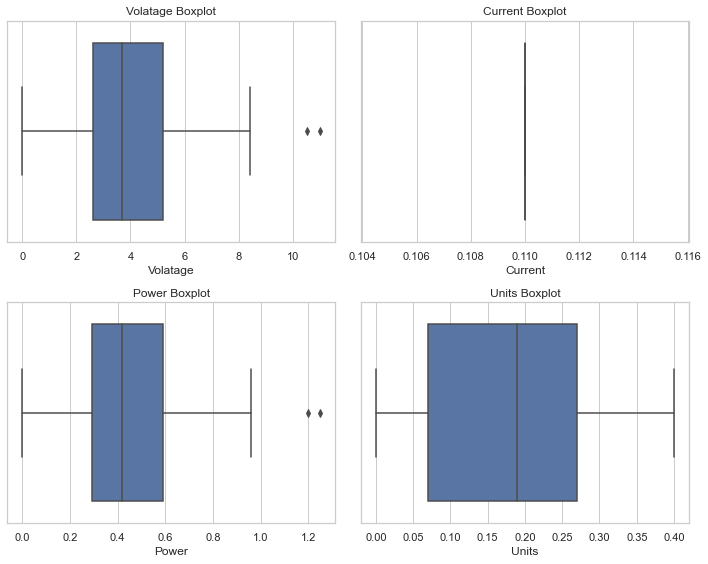

In [33]:
plt.figure(figsize=(10, 8))

for i, col in enumerate(df_cleaned.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'{col} Boxplot')

plt.tight_layout()
plt.show()

#### Isolation Forest

In [34]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.01)
outliers_iso = iso_forest.fit_predict(df_cleaned[['Volatage', 'Current', 'Power', 'Units']])

df_cleaned['Outlier'] = outliers_iso
outlier_rows = df_cleaned[df_cleaned['Outlier'] == -1]
print(outlier_rows)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\ombav\AppData\Local\Temp\ipykernel_21740\2737867271.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Outlier'] = outliers_iso


                       Date      Time  Volatage  Current  Power  Units  \
190 2024-10-08 21:44:44.967  21:44:44     11.01     0.11   1.25   0.10   
246 2024-10-08 21:51:19.551  21:51:19      8.40     0.11   0.96   0.15   
303 2024-10-08 21:57:41.663  21:57:41      8.07     0.11   0.92   0.19   
426 2024-10-08 22:12:15.083  22:12:15      0.00     0.11   0.00   0.26   
490 2024-10-08 22:19:41.445  22:19:41      8.28     0.11   0.94   0.32   
495 2024-10-08 22:20:13.991  22:20:13     10.51     0.11   1.20   0.32   

     Outlier  
190       -1  
246       -1  
303       -1  
426       -1  
490       -1  
495       -1  


In [35]:
df_cleaned.to_csv("Energy Meter 1.csv")

#### LOF

In [36]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
outliers_lof = lof.fit_predict(df_cleaned[['Volatage', 'Current', 'Power', 'Units']])

df_cleaned['LOF_Outlier'] = outliers_lof
outlier_rows_lof = df_cleaned[df_cleaned['LOF_Outlier'] == -1]
print(outlier_rows_lof)

                       Date      Time  Volatage  Current  Power  Units  \
181 2024-10-08 21:43:42.347  21:43:42      7.29     0.11   0.83   0.08   
190 2024-10-08 21:44:44.967  21:44:44     11.01     0.11   1.25   0.10   
246 2024-10-08 21:51:19.551  21:51:19      8.40     0.11   0.96   0.15   
303 2024-10-08 21:57:41.663  21:57:41      8.07     0.11   0.92   0.19   
490 2024-10-08 22:19:41.445  22:19:41      8.28     0.11   0.94   0.32   
495 2024-10-08 22:20:13.991  22:20:13     10.51     0.11   1.20   0.32   

     Outlier  LOF_Outlier  
181        1           -1  
190       -1           -1  
246       -1           -1  
303       -1           -1  
490       -1           -1  
495       -1           -1  


C:\Users\ombav\AppData\Local\Temp\ipykernel_21740\1242387527.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['LOF_Outlier'] = outliers_lof
